In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
d = pd.read_csv("nvda_stock_data.csv")

In [136]:
d.head(3)

,Date,Close,High,Low,Open,Volume
0,02-01-2020,5.972710,5.972710,5.893293,5.943831,237536000
1,03-01-2020,5.877111,5.920928,5.828067,5.852963,205384000
2,06-01-2020,5.901757,5.906985,5.757612,5.783752,262636000


In [137]:
d.tail()

,Date,Close,High,Low,Open,Volume
1253,24-12-2024,140.220001,141.899994,138.649994,140.000000,105157000
1254,26-12-2024,139.929993,140.850006,137.729996,139.699997,116205600
1255,27-12-2024,137.009995,139.020004,134.710007,138.550003,170582600
1256,30-12-2024,137.490005,140.270004,134.020004,134.830002,167734700
1257,31-12-2024,134.289993,138.070007,133.830002,138.029999,155659200


In [138]:
d.shape

(1258, 6)

In [139]:
# Changes The Date column as index columns
d.index = pd.to_datetime(d['Date'],format="%d-%m-%Y")

# drop The original date column
d = d.drop(['Date'], axis='columns')
d

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.972710,5.972710,5.893293,5.943831,237536000
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901757,5.906985,5.757612,5.783752,262636000
2020-01-07,5.973209,6.019017,5.885078,5.930139,314856000
2020-01-08,5.984413,6.025740,5.928896,5.968977,277108000
...,...,...,...,...,...
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.929993,140.850006,137.729996,139.699997,116205600
2024-12-27,137.009995,139.020004,134.710007,138.550003,170582600


In [140]:
d.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.972710,5.972710,5.893293,5.943831,237536000
2020-01-03,5.877111,5.920928,5.828067,5.852963,205384000
2020-01-06,5.901757,5.906985,5.757612,5.783752,262636000
2020-01-07,5.973209,6.019017,5.885078,5.930139,314856000
2020-01-08,5.984413,6.025740,5.928896,5.968977,277108000


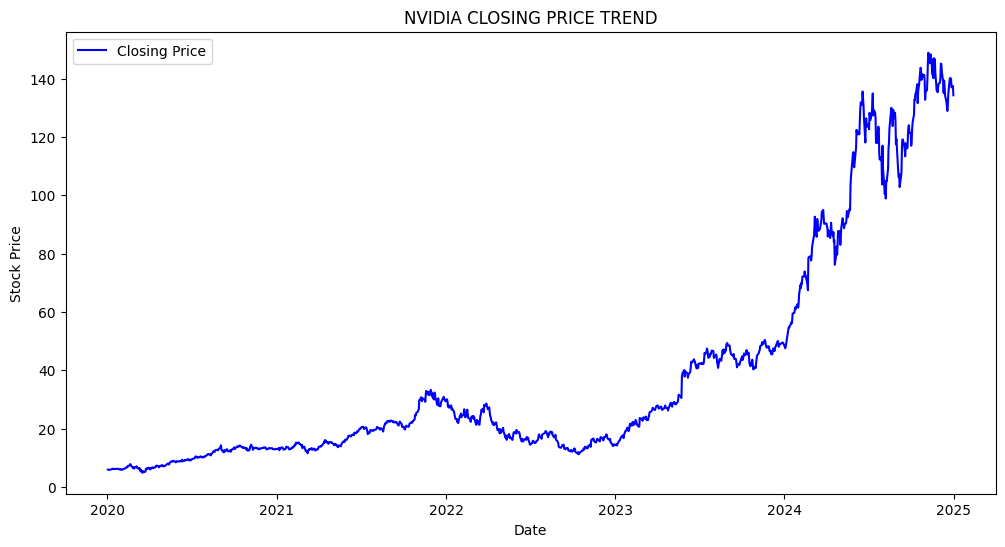

In [141]:
plt.figure(figsize=(12,6))
plt.plot(d.index,d["Close"],label="Closing Price",color = "blue")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("NVIDIA CLOSING PRICE TREND")
plt.legend()
plt.grid = True
plt.show()

PREPARE DATA FOR PREDICTIONS

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [144]:
df = d[["Close"]]
df["Target"] = d["Close"].shift(-1)
df.dropna(inplace=True)
d.index = pd.to_datetime(d['Date'],format="%d-%m-%Y")

C:\Users\satwi\AppData\Local\Temp\ipykernel_988\3286321116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"] = d["Close"].shift(-1)
C:\Users\satwi\AppData\Local\Temp\ipykernel_988\3286321116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


KeyError: 'Date'

In [145]:
df

,Close,Target
Date,,
2020-01-02,5.972710,5.877111
2020-01-03,5.877111,5.901757
2020-01-06,5.901757,5.973209
2020-01-07,5.973209,5.984413
2020-01-08,5.984413,6.050136
...,...,...
2024-12-23,139.669998,140.220001
2024-12-24,140.220001,139.929993
2024-12-26,139.929993,137.009995


START

In [147]:
df

,Close,Target
Date,,
2020-01-02,5.972710,5.877111
2020-01-03,5.877111,5.901757
2020-01-06,5.901757,5.973209
2020-01-07,5.973209,5.984413
2020-01-08,5.984413,6.050136
...,...,...
2024-12-23,139.669998,140.220001
2024-12-24,140.220001,139.929993
2024-12-26,139.929993,137.009995


In [148]:
x = df[["Close"]]
y = df["Target"]

In [149]:
y

Date
2020-01-02      5.877111
2020-01-03      5.901757
2020-01-06      5.973209
2020-01-07      5.984413
2020-01-08      6.050136
                 ...    
2024-12-23    140.220001
2024-12-24    139.929993
2024-12-26    137.009995
2024-12-27    137.490005
2024-12-30    134.289993
Name: Target, Length: 1257, dtype: float64

TRAIN TEST SPLIT

In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle = False)

TRAIN THE MODEL LINEAR REGRESSION

In [151]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [152]:
lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100

(99.61848272670738, 98.30358233680974)

In [153]:
y_pred = lr.predict(x)


In [154]:
len(y_pred), len(y_test), len(y), len(x)



(1257, 252, 1257, 1257)

In [155]:
df["Pred"] = y_pred

C:\Users\satwi\AppData\Local\Temp\ipykernel_988\3694125552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pred"] = y_pred


In [156]:
df

,Close,Target,Pred
Date,,,
2020-01-02,5.972710,5.877111,6.013179
2020-01-03,5.877111,5.901757,5.917563
2020-01-06,5.901757,5.973209,5.942214
2020-01-07,5.973209,5.984413,6.013679
2020-01-08,5.984413,6.050136,6.024885
...,...,...,...
2024-12-23,139.669998,140.220001,139.735744
2024-12-24,140.220001,139.929993,140.285851
2024-12-26,139.929993,137.009995,139.995787


VISUALIZATION

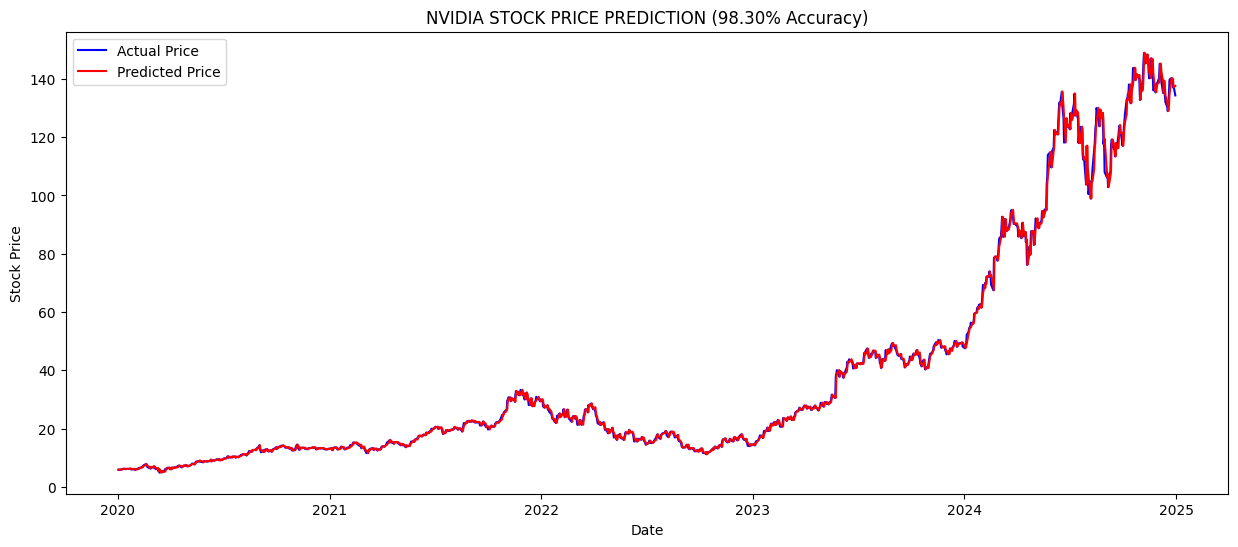

In [163]:
plt.figure(figsize=(15,6))
plt.plot(df.index[-len(df["Target"]):],df["Target"],label="Actual Price",color="blue")
plt.plot(df.index[-len(df["Pred"]):],df["Pred"],label="Predicted Price",color="r")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("NVIDIA STOCK PRICE PREDICTION (98.30% Accuracy)")
plt.legend()
plt.show()

VISUALIZATION SCALER

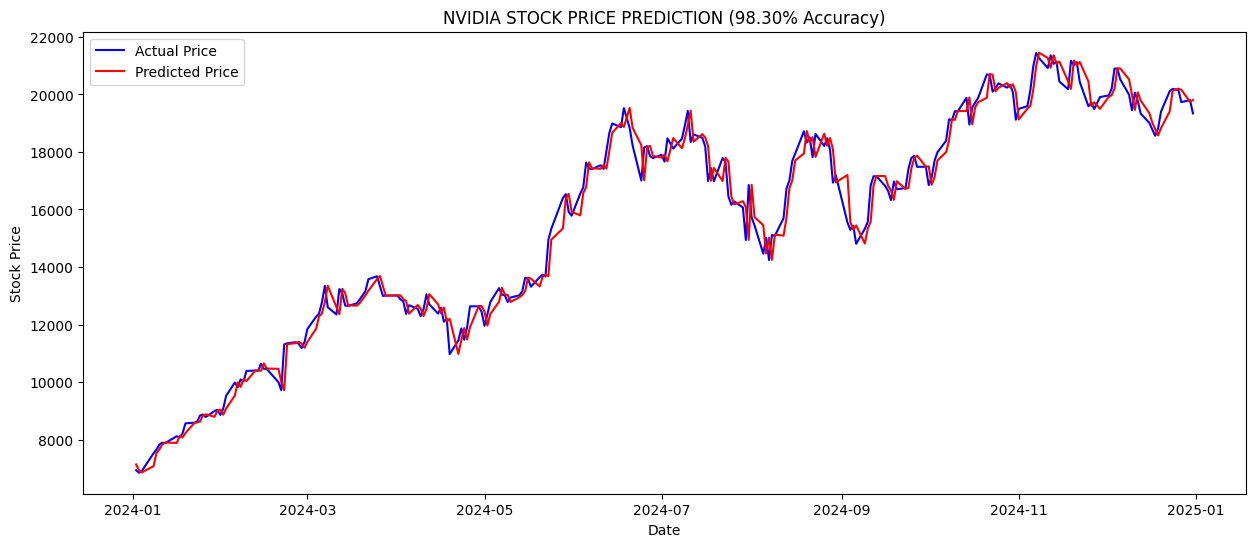

In [164]:
plt.figure(figsize=(15,6))
plt.plot(d.index[-len(y_test_original):],y_test_original,label="Actual Price",color="blue")
plt.plot(d.index[-len(y_pred_original):],y_pred_original,label="Predicted Price",color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("NVIDIA STOCK PRICE PREDICTION (98.30% Accuracy)")
plt.legend()
plt.show()